In [1]:
# Tasks..developing a model for predicting turnover events

In [2]:
#importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,15)

In [3]:
#loading the dataset
df=pd.read_csv('C://users/sojore/Downloads/EDITS/turnover analysis/turnover.csv')
df.head()

,stag,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
0,7.030801,1,m,35.0,Banks,HR,rabrecNErab,no,f,white,bus,6.2,4.1,5.7,7.1,8.3
1,22.965092,1,m,33.0,Banks,HR,empjs,no,m,white,bus,6.2,4.1,5.7,7.1,8.3
2,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,6.2,6.2,2.6,4.8,8.3
3,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,5.4,7.6,4.9,2.5,6.7
4,8.410678,1,m,32.0,Retail,Commercial,youjs,yes,f,white,bus,3.0,4.1,8.0,7.1,3.7


In [6]:
#exploring the dataset
df.groupby('industry')['industry'].agg('count').sort_values(ascending=False)

industry
Retail             289
manufacture        145
IT                 122
Banks              114
etc                 94
Consult             74
State               55
Building            41
transport           38
PowerGeneration     38
Telecom             36
Mining              24
Pharma              20
Agriculture         15
RealEstate          13
 HoReCa             11
Name: industry, dtype: int64

In [7]:
df.isna().sum()

stag            0
event           0
gender          0
age             0
industry        0
profession      0
traffic         0
coach           0
head_gender     0
greywage        0
way             0
extraversion    0
independ        0
selfcontrol     0
anxiety         0
novator         0
dtype: int64

In [9]:
#no missing vals 
df.dtypes

stag            float64
event             int64
gender           object
age             float64
industry         object
profession       object
traffic          object
coach            object
head_gender      object
greywage         object
way              object
extraversion    float64
independ        float64
selfcontrol     float64
anxiety         float64
novator         float64
dtype: object

In [10]:
df.sample(2)

,stag,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
155,8.772074,1,f,27.0,Retail,HR,rabrecNErab,my head,f,white,car,6.2,4.8,6.4,6.3,2.9
660,96.591376,0,f,46.0,etc,Marketing,friends,no,m,white,bus,4.6,8.4,4.9,7.9,6.0


In [13]:
#outlier handling and detection
df['stag2']=df['stag']**2
df['age2']=df['age']**2
df['extraversion2']=df['extraversion']**2
df['independ2']=df['independ']**2
df['selfcontrol2']=df['selfcontrol']**2
df['anxiety2']=df['anxiety']**2
df['novator2']=df['novator']**2
df.head(3)

,stag,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,...,selfcontrol,anxiety,novator,stag2,age2,extraversion2,independ2,selfcontrol2,anxiety2,novator2
0,7.030801,1,m,35.0,Banks,HR,rabrecNErab,no,f,white,...,5.7,7.1,8.3,49.432160,1225.0,38.44,16.81,32.49,50.41,68.89
1,22.965092,1,m,33.0,Banks,HR,empjs,no,m,white,...,5.7,7.1,8.3,527.395469,1089.0,38.44,16.81,32.49,50.41,68.89
2,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,...,2.6,4.8,8.3,253.901648,1225.0,38.44,38.44,6.76,23.04,68.89


In [20]:
df1=df.copy()
#using quantile function to detect and filter outliers
ll1=df1.stag2.quantile(0.01)
ul1=df1.stag2.quantile(0.99)
df1[(df1.stag2<=ll1) | (df1.stag2>=ul1)]
df2=df1[(df1.stag2>=ll1) & (df1.stag2<=ul1)]
df2.shape

(1106, 23)

In [23]:
ll2=df2.age2.quantile(0.01)
ul2=df2.age2.quantile(0.99)
df2[(df2.age2<=ll2) | (df2.age2>=ul2)].shape
df3=df2[(df2.age2>ll2) & (df2.age2<ul2)]
df3.shape

(1079, 23)

In [26]:
ll3=df3.extraversion2.quantile(0.01)
ul3=df3.extraversion2.quantile(0.99)
df3[(df3.extraversion2<=ll3) | (df3.extraversion2>=ul3)].shape
df4=df3[(df3.extraversion2>ll3) & (df3.extraversion2<ul3)]
df4.shape

(1019, 23)

In [31]:
ll4=df4.independ2.quantile(0.01)
ul4=df4.independ2.quantile(0.99)
df4[(df4.independ2<=ll4) | (df4.independ2>=ul4)].shape
df5=df4[(df4.independ2>ll4) & (df4.independ2<ul4)]
df5.shape

(966, 23)

In [34]:
ll5=df5.selfcontrol2.quantile(0.01)
ul5=df5.selfcontrol2.quantile(0.99)
df5[(df5.selfcontrol2<=ll5) | (df5.selfcontrol2>=ul5)].shape
df6=df5[(df5.selfcontrol2>ll5) & (df5.selfcontrol2<ul5)]
df6.shape

(929, 23)

In [37]:
ll6=df6.anxiety2.quantile(0.01)
ul6=df6.anxiety2.quantile(0.99)
df6[(df6.anxiety2<=ll6) | (df6.anxiety2>=ul6)].shape
df7=df6[(df6.anxiety2>ll6) & (df6.anxiety2<ul6)]
df7.shape

(868, 23)

In [39]:
ll7=df7.novator2.quantile(0.01)
ul7=df7.novator2.quantile(0.99)
df7[(df7.novator2<=ll7) | (df7.novator2>ul7)].shape
df8=df7[(df7.novator2>ll7) & (df7.novator2<ul7)]
df8.shape

(846, 23)

In [42]:
ll8=df8.stag.quantile(0.01)
ul8=df8.stag.quantile(0.99)
df8[(df8.stag<=ll8) | (df8.stag>=ul8)].shape
df9=df8[(df8.stag>ll8) & (df8.stag<ul8)]
df9.shape

(826, 23)

In [44]:
ll9=df9.age.quantile(0.01)
ul9=df9.age.quantile(0.99)
df9[(df9.age<=ll9) | (df9.age>=ul9)].shape
df10=df9[(df9.age>ll8) & (df9.age<ul9)]
df10.shape

(810, 23)

In [46]:
ll10=df10.extraversion.quantile(0.01)
ul10=df10.extraversion.quantile(0.99)
df10[(df10.extraversion<=ll10) | (df10.extraversion>=ul10)].shape
df11=df10[(df10.extraversion>ll10) & (df10.extraversion<ul10)]
df11.shape

(744, 23)

In [50]:
ll11=df11.independ.quantile(0.001)
ul11=df11.independ.quantile(0.999)
df11[(df11.independ<=ll11) | (df11.independ>=ul11)].shape
df12=df11[(df11.independ>ll11) & (df11.independ<ul11)]
df12.shape

(676, 23)

In [54]:
ll12=df12.selfcontrol.quantile(0.01)
ul12=df12.selfcontrol.quantile(0.99)
df12[(df12.selfcontrol<=ll12) | (df12.selfcontrol>=ul12)].shape
df13=df12[(df12.selfcontrol>ll12) & (df12.selfcontrol<ul12)]
df13.shape

(624, 23)

In [56]:
ll13=df13.anxiety.quantile(0.01)
ul13=df13.anxiety.quantile(0.99)
df13[(df13.anxiety<=ll13) | (df13.anxiety>=ul13)].shape
df14=df13[(df13.anxiety>ll13) & (df13.anxiety<ul13)]
df14.shape

(543, 23)

In [58]:
ll14=df14.novator.quantile(0.01)
ul14=df14.novator.quantile(0.99)
df14[(df14.novator<=ll14) | (df14.novator>=ul14)].shape
df15=df14[(df14.novator>ll14) & (df14.novator<ul14)]
df15.shape

(507, 23)

In [63]:
#dropping unneccesary columns
df16=df15.drop(['stag2','age2','extraversion2','independ2','selfcontrol2','anxiety2','novator2','head_gender'],axis='columns')
df16.sample(3)

,stag,event,gender,age,industry,profession,traffic,coach,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
214,63.112936,1,m,32.0,Mining,Law,rabrecNErab,no,white,bus,3.0,4.8,4.1,7.1,7.5
96,3.351129,1,f,24.0,Consult,HR,youjs,no,white,bus,4.6,6.9,5.7,5.6,2.9
667,9.264887,1,f,23.0,Retail,HR,youjs,no,white,bus,7.0,5.5,3.3,4.8,6.7


In [73]:
df16.way.unique()

array(['bus', 'car', 'foot'], dtype=object)

In [80]:
df17=df16.replace(['m','f'],[1,0])
df18=df17.replace(['no','yes','my head'],[0,1,2])
df19=df18.replace(['white', 'grey'],[1,0])
df20=df19.replace(['bus', 'car', 'foot'],[0,1,2])
df20.head()

,stag,event,gender,age,industry,profession,traffic,coach,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
0,7.030801,1,1,35.0,Banks,HR,rabrecNErab,0,1,0,6.2,4.1,5.7,7.1,8.3
1,22.965092,1,1,33.0,Banks,HR,empjs,0,1,0,6.2,4.1,5.7,7.1,8.3
4,8.410678,1,1,32.0,Retail,Commercial,youjs,1,1,0,3.0,4.1,8.0,7.1,3.7
5,8.969199,1,0,42.0,manufacture,HR,empjs,1,1,0,6.2,6.2,4.1,5.6,6.7
6,8.969199,1,0,42.0,manufacture,HR,empjs,1,1,0,6.2,6.2,4.1,5.6,6.7


In [81]:
from sklearn.preprocessing import LabelEncoder
le_industry=LabelEncoder()
le_profession=LabelEncoder()
le_traffic=LabelEncoder()
df20.industry=le_industry.fit_transform(df20.industry)
df20.profession=le_profession.fit_transform(df20.profession)
df20.traffic=le_traffic.fit_transform(df20.traffic)
df20.head()

,stag,event,gender,age,industry,profession,traffic,coach,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
0,7.030801,1,1,35.0,2,6,4,0,1,0,6.2,4.1,5.7,7.1,8.3
1,22.965092,1,1,33.0,2,6,2,0,1,0,6.2,4.1,5.7,7.1,8.3
4,8.410678,1,1,32.0,10,2,7,1,1,0,3.0,4.1,8.0,7.1,3.7
5,8.969199,1,0,42.0,14,6,2,1,1,0,6.2,6.2,4.1,5.6,6.7
6,8.969199,1,0,42.0,14,6,2,1,1,0,6.2,6.2,4.1,5.6,6.7


In [82]:
df20.dtypes

stag            float64
event             int64
gender            int64
age             float64
industry          int32
profession        int32
traffic           int32
coach             int64
greywage          int64
way               int64
extraversion    float64
independ        float64
selfcontrol     float64
anxiety         float64
novator         float64
dtype: object

In [83]:
#splitting the dataset for training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df20.drop('event',axis='columns'),df20.event,test_size=0.2,random_state=10)

In [84]:
X_train.shape

(405, 14)

In [85]:
len(X_test)

102

In [86]:
##creating a machine learning model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

In [87]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [89]:
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
def find_best_model_using_gridsearchcv(X,y):
    models={
        'linear_regression':{
            'model':LinearRegression(),
            'params':{
                'normalize':[True,False]
            }
        },
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'decision_tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }
        },
        'svm':{
            'model':SVC(),
            'params':{
                'C':[1,2,3],
                'kernel':['linear','rbf']
            }
        },
        'random_forest':{
            'model':RandomForestClassifier(),
            'params':{
                
            }
        },
        'logistic_regression':{
            'model':LogisticRegression(),
            'params':{}
        }
    }
#this is what we call hyper parameter tunning

    my_scores=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for model_name,config in models.items():
        gs=GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(X,y)
        my_scores.append({
            'model':model_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
    return pd.DataFrame(my_scores,columns=['model','best_score','best_params'])


In [90]:
find_best_model_using_gridsearchcv(X_train,y_train)

C:\Users\sojore\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sojore\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

,model,best_score,best_params
0,linear_regression,-0.060514,{'normalize': False}
1,lasso,-0.015493,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,-0.655960,"{'criterion': 'mse', 'splitter': 'random'}"
3,svm,0.503704,"{'C': 3, 'kernel': 'rbf'}"
4,random_forest,0.582716,{}
5,logistic_regression,0.496296,{}


In [91]:
#from the above i can choose the best algorithm to create my model
#i will simply employ RandomForestClassifier for my model creation
model=RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [92]:
#let me get the score of the model
model.score(X_test,y_test)

0.5980392156862745

In [93]:
#now i can use the model to do predictions
y_predicted=model.predict(X_test)
y_predicted[:10]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [94]:
y_test[:10]

713    1
416    0
135    1
809    0
330    1
966    1
344    0
275    0
612    0
510    0
Name: event, dtype: int64

Text(159.0, 0.5, 'Truth')

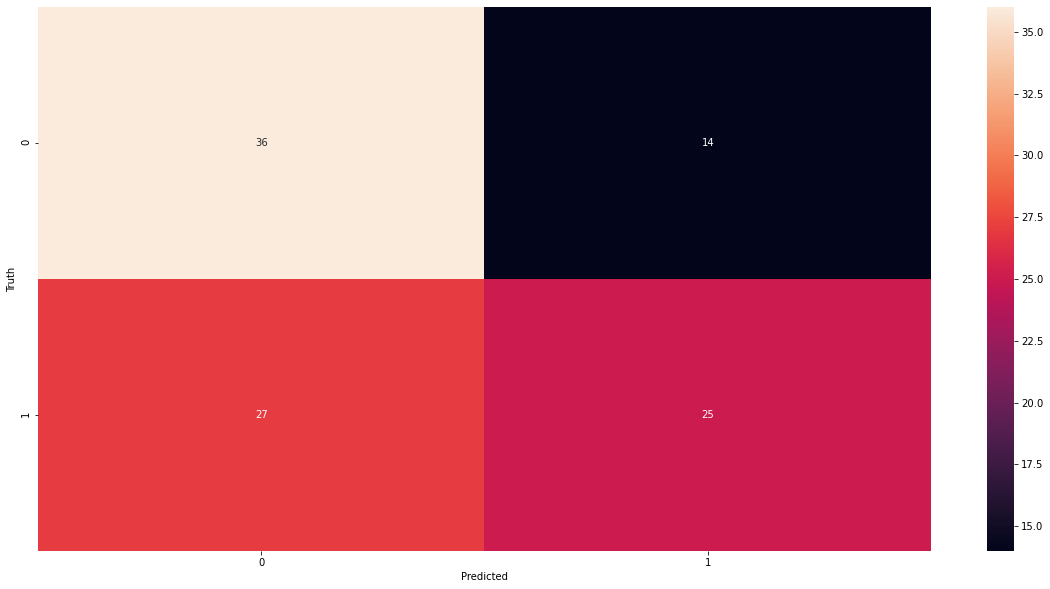

In [95]:
#next i will create a heatmap for a better visualization of the predicted results
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sn
cm=confusion_matrix(y_test,y_predicted)
plt.figure(figsize=(20,10))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [96]:
#my model is doing pretty good on doing the predictions
#next i can print a classification report
print('Classification Report: \n',classification_report(y_test,y_predicted))

Classification Report: 
               precision    recall  f1-score   support

           0       0.57      0.72      0.64        50
           1       0.64      0.48      0.55        52

    accuracy                           0.60       102
   macro avg       0.61      0.60      0.59       102
weighted avg       0.61      0.60      0.59       102



In [97]:
#using neural networks (ANN)  to create model2 to see and compare its perfomance

In [98]:
##import important libraries
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras.models import Sequential

In [102]:
X_train.shape

(405, 14)

In [103]:
##using artificial neural network to do e above tasks
model2=keras.Sequential([
    keras.layers.Dense(14,input_dim=14,activation='relu'),
    keras.layers.Dense(7,activation='relu'),
    keras.layers.Dense(3,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])
model2.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
model2.fit(X_train,y_train,epochs=100,batch_size=8)

Epoch 1/100
51/51 [==============================] - 5s 9ms/step - loss: 0.9884 - accuracy: 0.4864
Epoch 2/100
51/51 [==============================] - 0s 5ms/step - loss: 0.7013 - accuracy: 0.4988
Epoch 3/100
51/51 [==============================] - 1s 14ms/step - loss: 0.6958 - accuracy: 0.5037
Epoch 4/100
51/51 [==============================] - 0s 8ms/step - loss: 0.6936 - accuracy: 0.5037
Epoch 5/100
51/51 [==============================] - 0s 6ms/step - loss: 0.6929 - accuracy: 0.4988
Epoch 6/100
51/51 [==============================] - 0s 5ms/step - loss: 0.6923 - accuracy: 0.5037
Epoch 7/100
51/51 [==============================] - 0s 9ms/step - loss: 0.6923 - accuracy: 0.5111
Epoch 8/100
51/51 [==============================] - 0s 7ms/step - loss: 0.6925 - accuracy: 0.5012
Epoch 9/100
51/51 [==============================] - 0s 6ms/step - loss: 0.6923 - accuracy: 0.5062
Epoch 10/100
51/51 [==============================] - 0s 6ms/step - loss: 0.6925 - accuracy: 0.5062
Epoch 11

51/51 [==============================] - 0s 7ms/step - loss: 0.6556 - accuracy: 0.6025
Epoch 81/100
51/51 [==============================] - 0s 9ms/step - loss: 0.6512 - accuracy: 0.6198
Epoch 82/100
51/51 [==============================] - 0s 8ms/step - loss: 0.6538 - accuracy: 0.6025
Epoch 83/100
51/51 [==============================] - 0s 10ms/step - loss: 0.6482 - accuracy: 0.6198
Epoch 84/100
51/51 [==============================] - 0s 6ms/step - loss: 0.6553 - accuracy: 0.6000
Epoch 85/100
51/51 [==============================] - 0s 6ms/step - loss: 0.6515 - accuracy: 0.6025
Epoch 86/100
51/51 [==============================] - 0s 9ms/step - loss: 0.6506 - accuracy: 0.6099
Epoch 87/100
51/51 [==============================] - 0s 8ms/step - loss: 0.6447 - accuracy: 0.6296
Epoch 88/100
51/51 [==============================] - 0s 10ms/step - loss: 0.6473 - accuracy: 0.6099
Epoch 89/100
51/51 [==============================] - 0s 7ms/step - loss: 0.6444 - accuracy: 0.6296
Epoch 90/10

In [104]:
##my model is doing fairly good on the train dataset
#we now gonna test our model on the test dataset
model2.evaluate(X_test,y_test)

4/4 [==============================] - 1s 6ms/step - loss: 0.7332 - accuracy: 0.4706


[0.7332072257995605, 0.47058823704719543]

In [105]:
y_pred=model2.predict(X_test).reshape(-1)
print(y_pred[:10])

y_pred=np.round(y_pred)
print(y_pred[:10])

[0.50458056 0.34313107 0.5475975  0.5831484  0.3197995  0.5831484
 0.5831484  0.5485458  0.5384842  0.2842875 ]
[1. 0. 1. 1. 0. 1. 1. 1. 1. 0.]


In [106]:
y_test[:10]

713    1
416    0
135    1
809    0
330    1
966    1
344    0
275    0
612    0
510    0
Name: event, dtype: int64

In [107]:
##now we print the classification report
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.44      0.28      0.34        50
           1       0.49      0.65      0.56        52

    accuracy                           0.47       102
   macro avg       0.46      0.47      0.45       102
weighted avg       0.46      0.47      0.45       102



In [108]:
###using dropout layers to try improve the performance of our ANN model
modeld=keras.Sequential([
    keras.layers.Dense(14,input_dim=14,activation='relu'),
    keras.layers.Dropout(0.5),#this layer will drop 50% of the neurons-----the good practice is we put dropout layer after each
    #hidden layer
    keras.layers.Dense(7,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(5,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1,activation='sigmoid')
])
modeld.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
modeld.fit(X_train,y_train,epochs=100,batch_size=8)

Epoch 1/100
51/51 [==============================] - 3s 7ms/step - loss: 11.2951 - accuracy: 0.4938
Epoch 2/100
51/51 [==============================] - 1s 7ms/step - loss: 6.0684 - accuracy: 0.5012
Epoch 3/100
51/51 [==============================] - 0s 3ms/step - loss: 3.7346 - accuracy: 0.5086
Epoch 4/100
51/51 [==============================] - 0s 6ms/step - loss: 3.3035 - accuracy: 0.5111: 0s - loss: 3.0610 - accuracy: 
Epoch 5/100
51/51 [==============================] - 0s 6ms/step - loss: 3.2762 - accuracy: 0.5086
Epoch 6/100
51/51 [==============================] - 0s 6ms/step - loss: 2.0172 - accuracy: 0.4914
Epoch 7/100
51/51 [==============================] - 0s 5ms/step - loss: 1.2364 - accuracy: 0.5259
Epoch 8/100
51/51 [==============================] - 0s 9ms/step - loss: 1.5394 - accuracy: 0.4938: 0s - loss: 1.5462 - accuracy: 0.
Epoch 9/100
51/51 [==============================] - 0s 6ms/step - loss: 1.4483 - accuracy: 0.4840
Epoch 10/100
51/51 [======================

51/51 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.4963
Epoch 81/100
51/51 [==============================] - 0s 6ms/step - loss: 0.6898 - accuracy: 0.5086
Epoch 82/100
51/51 [==============================] - 0s 9ms/step - loss: 0.6932 - accuracy: 0.4790
Epoch 83/100
51/51 [==============================] - ETA: 0s - loss: 0.6931 - accuracy: 0.46 - 0s 6ms/step - loss: 0.6924 - accuracy: 0.4741
Epoch 84/100
51/51 [==============================] - 0s 5ms/step - loss: 0.6930 - accuracy: 0.4963
Epoch 85/100
51/51 [==============================] - 1s 10ms/step - loss: 0.6917 - accuracy: 0.4765
Epoch 86/100
51/51 [==============================] - 0s 5ms/step - loss: 0.6937 - accuracy: 0.4889
Epoch 87/100
51/51 [==============================] - 1s 10ms/step - loss: 0.6945 - accuracy: 0.4963
Epoch 88/100
51/51 [==============================] - 0s 9ms/step - loss: 0.6928 - accuracy: 0.5012
Epoch 89/100
51/51 [==============================] - 0s 7ms/step - l

In [109]:
modeld.evaluate(X_test,y_test)

4/4 [==============================] - 1s 7ms/step - loss: 0.6931 - accuracy: 0.5098


[0.693098783493042, 0.5098039507865906]